In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [199]:
#pemanggilan data
data = pd.read_csv("produk_elektronik (2).csv")

In [200]:
data.head()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,1,Produk_1,Smartwatch,746.0,4.2,273.0,Japan
1,2,Produk_2,Headphone,241.0,3.5,239.0,Canada
2,3,Produk_3,Tablet,810.0,3.8,209.0,Canada
3,4,Produk_4,Headphone,303.0,3.2,59.0,South Korea
4,5,Produk_5,Headphone,252.0,3.7,76.0,South Korea


In [201]:
data.tail(5)

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
545,546,Produk_546,Laptop,496.0,3.9,19.0,China
546,547,Produk_547,Headphone,628.0,4.7,414.0,USA
547,548,Produk_548,Tablet,465.0,4.3,393.0,India
548,549,Produk_549,Laptop,495.0,3.1,311.0,Germany
549,550,Produk_550,Tablet,388.0,4.3,240.0,Germany


In [202]:
#melihat statistika deskriptif
data.describe()

,produk_id,harga,rating,jumlah_ulasan
count,550.000000,520.000000,500.000000,530.000000
mean,275.500000,565.715385,4.005600,259.671698
std,158.915596,625.886725,0.571052,142.655380
min,1.000000,-213.000000,3.000000,12.000000
25%,138.250000,374.000000,3.500000,139.000000
50%,275.500000,516.000000,4.000000,262.500000
75%,412.750000,656.250000,4.500000,390.750000
max,550.000000,8341.000000,5.000000,499.000000


In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


Berdasarkan output di atas, dapat disimpulkan bahwa dataset tersebut memiliki total 7 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak 550 baris. Akan tetapi, terdapat beberapa kolom yang memiliki jumlah data kurang dari 550. Maka akan dilakukan proses identifikasi lebih lanjut

# Deteksi Missing Value

In [204]:
data.isnull()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [205]:
data.isnull().sum()

,0
produk_id,0
nama_produk,0
kategori,0
harga,30
rating,50
jumlah_ulasan,20
negara_asal,0


1. B. Jadi, terdapat missing values dalam dataset
2. A. Berdasarkan output tersebut, dapat disimpulkan bahwa kolom-kolom yang mengandung missing values dalam dataset ini adalah:

 *   harga sebanyak 30 missing values.
 *   rating sebanyak 50 missing values.
 *   jumlah_ulasan sebanyak 20 missing values.

   B. Keberadaan missing values dapat memengeruhi analisis data, sebagai berikut:
  *   **Bias Statistik:** Missing values dapat menyebabkan bias dalam perhitungan statistik deskriptif seperti rata-rata dan deviasi standar. Hal ini dapat mengakibatkan representasi yang tidak akurat dari distribusi data sebenarnya.
  *   **Pengurangan Daya Inferensial:** Dalam analisis inferensial, keberadaan missing values dapat mengurangi kekuatan statistik dan akurasi hasil pengujian hipotesis. Hal ini membuat interpretasi hasil menjadi kurang.
  *   **Ketidakpastian dalam Pengambilan Keputusan:** Keberadaan missing values dapat memperkenalkan ketidakpastian dalam proses pengambilan keputusan. Keputusan yang terambil berdasarkan data yang tidak lengkap dapat memiliki konsekuensi yang tidak kita inginkan.
  *   **Gangguan pada Konsistensi dan Kelangsungan Analisis:** Missing values dapat mengganggu konsistensi analisis data, terutama jika penanganan yang konsisten tidak diterapkan. Ini dapat menghambat proses pengembangan model dan evaluasi kinerja.

In [206]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

100

# HANDLING MISSING VALUE
2. C. Metode yang paling sesuai untuk menangani missing values di setiap
kolom, sebagai berikut:

 *  Kolom harga menggunakan median karena harga produk sering memiliki outlier (misalnya, ada produk yang sangat mahal atau sangat murah). Median lebih aman menghadapi outlier seperti ini.
 *   Kolom rating menggunakan mean karena distribusi rating normal dan stabil.
 *   Kolom jumlah_ulasan menggunakan median karena jumlah ulasan biasanya tidak merata (banyak produk tanpa ulasan dan sedikit yang sangat populer dengan ulasan banyak). Median menghindari bias akibat outlier.

# HARGA

In [207]:
#Melihat isi dalam kolom harga

data['harga'].unique()

array([ 7.460e+02,  2.410e+02,  8.100e+02,  3.030e+02,  2.520e+02,
        3.350e+02,  8.900e+02,  4.910e+02,  6.050e+02,  4.630e+02,
        4.810e+02,  3.980e+02,  5.100e+02,  5.980e+02,  8.350e+02,
        1.250e+02,  8.220e+02,  4.260e+02,  3.900e+02,  7.080e+02,
        5.450e+02,        nan,  5.720e+02,  7.280e+02,  6.710e+02,
        3.740e+02,  2.310e+02,  4.340e+02,  1.150e+03,  3.310e+02,
        5.780e+02,  4.750e+02,  4.590e+02,  9.040e+02,  4.970e+02,
        5.400e+02,  3.390e+02,  2.110e+02,  8.620e+02,  5.800e+02,
        5.180e+02,  5.160e+02,  4.480e+02,  7.360e+02,  2.280e+02,
        1.830e+02,  5.150e+02,  7.120e+02,  5.470e+02,  4.360e+02,
        5.910e+02,  5.370e+02,  6.650e+02,  7.650e+02,  3.090e+02,
        4.290e+02,  2.960e+02,  6.660e+02,  3.550e+02,  1.240e+02,
        3.850e+02,  2.010e+02,  8.180e+02,  5.940e+02,  6.290e+02,
        6.070e+02,  6.680e+02,  7.260e+02,  3.920e+02,  2.160e+02,
        3.300e+02,  4.900e+02, -1.200e+01,  1.200e+02,  6.190e

In [208]:
#jumlah missing value
np.sum(data['harga'].isnull())

30

#RATING

In [209]:
#Melihat isi dalam kolom harga

data['rating'].unique()

array([4.2, 3.5, 3.8, 3.2, 3.7, 4. , 4.5, 3. , 3.9, 3.6, 4.7, 4.4, nan,
       3.1, 4.9, 4.6, 5. , 4.8, 4.3, 3.4, 4.1, 3.3])

In [210]:
#jumlah missing value
np.sum(data['rating'].isnull())

50

#JUMLAH ULASAN

In [211]:
#Melihat isi dalam kolom harga

data['jumlah_ulasan'].unique()

array([273., 239., 209.,  59.,  76., 309., 390.,  67., 268.,  nan, 335.,
       139., 224., 181., 267., 111., 218., 300., 363., 480., 295., 125.,
       159., 451.,  45., 462., 342., 486., 296., 312., 320., 217., 115.,
       455., 167., 130.,  64., 409.,  21., 154., 405., 145., 477.,  12.,
       153.,  39., 246., 288., 357., 113., 127.,  14., 257., 373., 330.,
       158.,  93., 463., 475., 465., 240., 297., 170., 281., 469.,  47.,
       235., 151., 301., 490., 160., 123.,  75., 370., 350., 484., 258.,
       466., 458., 340., 332., 189., 199., 416., 163., 205., 271., 428.,
       415., 436., 152., 351., 110., 253., 499., 248.,  58.,  51., 175.,
        91., 438., 225., 471., 143., 345.,  16., 445.,  23.,  82., 408.,
       414., 172., 356., 215., 285., 265., 275.,  34., 459., 290., 262.,
       319., 298., 173., 104., 119., 247., 396., 492., 434., 399., 150.,
       126., 491., 401., 461.,  88.,  77., 182., 453., 137., 105., 101.,
        40., 343.,  29., 155., 325., 456., 169., 35

In [212]:
#jumlah missing value
np.sum(data['jumlah_ulasan'].isnull())

20

In [213]:
#NOMOR 2D. MENANGANI MISSING VALUES DENGAN METODE YANG SESUAI

#Menangani missing values dengan metode yang sesuai
data["harga"] = data["harga"].fillna(data["harga"].median())
data["rating"] = data["rating"].fillna(data["rating"].mean())
data["jumlah_ulasan"] = data["jumlah_ulasan"].fillna(data["jumlah_ulasan"].median())

#Menampilkan jumlah missing values setelah penanganan
print("Jumlah missing values setelah penanganan:\n", data.isnull().sum())

Jumlah missing values setelah penanganan:
 produk_id        0
nama_produk      0
kategori         0
harga            0
rating           0
jumlah_ulasan    0
negara_asal      0
dtype: int64


In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          550 non-null    float64
 4   rating         550 non-null    float64
 5   jumlah_ulasan  550 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


# CEK DAN PENANGANAN OUTLIER

Cek Outlier Outlier dapat dideteksi menggunakan beberapa metode:

1.   Boxplot → Visualisasi distribusi dan outlier
2.   Interquartile Range (IQR) → Mengidentifikasi outlier berdasarkan distribusi kuartil

**1. Boxplot**

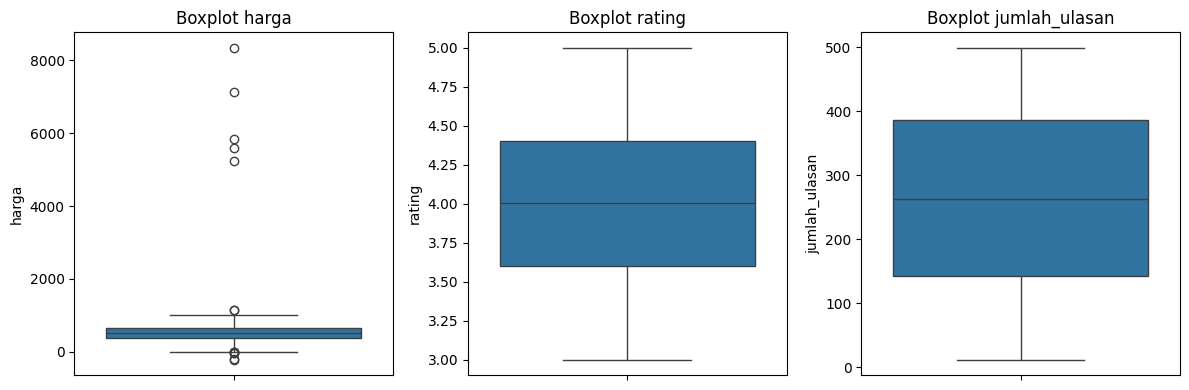

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang tersedia di dataset
num_cols = ['harga', 'rating', 'jumlah_ulasan']

# Visualisasi Boxplot untuk cek outlier
plt.figure(figsize=(12, 4))  # Atur ukuran figure
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)  # 1 baris, 3 kolom
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

**2. IQR**

In [216]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]


# Mengecek dan menampilkan jumlah outlier pada setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"- {col}: {len(outliers)} outliers")

- harga: 14 outliers
- rating: 0 outliers
- jumlah_ulasan: 0 outliers


3. B. Dampak dari keberadaan outlier terhadap analisis

 *   Distorsi analisis: Outlier dapat menyebabkan hasil analisis statistik dan model prediksi menyimpang sehingga menghasilkan kesimpulan yang tidak tepat1. Outlier dapat mempengaruhi hasil analisis statistik seperti mean, varians, dan regresi.
 * Pemahaman data yang kurang tepat:  Outlier dapat mengaburkan pola sebenarnya dalam data sehingga perusahaan sulit membuat strategi yang tepat.
 *  Validitas analisis terganggu: Outlier dapat memengaruhi distribusi data secara keseluruhan dan mengganggu asumsi dasar dalam metode analisis data.
 *  Indikasi kesalahan atau kecurangan: Outlier bisa menjadi indikator adanya kecurangan atau kesalahan dalam data, seperti kesalahan pengukuran atau penginputan data.
 *  Statistik deskriptif menjadi tidak akurat: Outlier dapat memengaruhi nilai rata-rata, median, dan standar deviasi.
 *  Model prediksi menjadi bias: Outlier dapat memengaruhi parameter model dan menghasilkan prediksi yang kurang akurat.
 *  Menyembunyikan pola dan tren: Outlier dapat menyembunyikan pola dan tren yang sebenarnya ada dalam data.
 *  Keputusan yang tidak valid: Jika outlier tidak ditangani dengan benar, keputusan yang diambil berdasarkan data dapat menjadi tidak valid atau menyesatkan.
 *  Estimasi tidak akurat: Outlier dapat menyebabkan estimasi yang tidak akurat, mengubah nilai rata-rata, dan distorsi dalam analisis
 *  Masalah pada pengujian hipotesis: Outlier dapat memengaruhi hasil pengujian hipotesis, seperti uji t atau uji chi-square, dengan mengubah distribusi data dan nilai p.

 C. Metode yang sesuai untuk menangani outlier adalah winsorizing atau mengganti Outlier dengan Batas IQR. Karena jika data penting dan tidak boleh dihapus, kita bisa mengganti outlier dengan batas kuartil. Kolom harga produk mengandung outlier yang dapat memengaruhi hasil analisis. Metode yang dipilih untuk menangani outlier adalah Winsorizing atau mengganti nilai outlier dengan batas IQR.Metode ini dipilih karena:
Harga produk bersifat kontinu dan rentan memiliki nilai ekstrem.

 *   Winsorizing menjaga data tetap utuh tanpa menghapus baris data.
 *   Mengurangi distorsi akibat outlier tanpa mengubah distribusi data secara drastis.
 *   Lebih sesuai daripada mean karena harga produk bisa tidak berdistribusi normal.

In [217]:
# NO. 3D. Menangani Outlier

def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

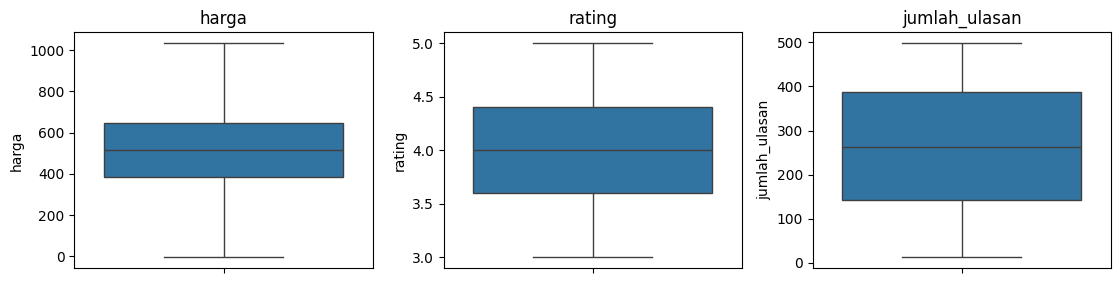

In [218]:
#cek boxplot lagi

num_cols = ['harga', 'rating', 'jumlah_ulasan']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# ENCODING DATA KATEGORIK

4. A.  Kolom yang memerlukan encoding adalah kolom kategori dan kolom negara asal.

  B. Perbandingan Metode Encoding
 *   One-Hot Encoding (OHE)

     One-Hot Encoding merupakan metode yang mengubah setiap kategori menjadi kolom biner (0/1). Metode ini cocok untuk data nominal karena tidak memunculkan asumsi urutan antar kategori. Namun, kekurangannya adalah menambah jumlah kolom (dimensi data), sehingga kurang ideal jika jumlah kategori sangat banyak.Contoh: Untuk kolom kategori yang berisi 6 jenis produk (seperti Smartwatch, Headphone, Tablet, Laptop, Camera, Smartphone), One-Hot Encoding akan membuat 6 kolom baru.
     
     Kesimpulan: Sesuai digunakan karena jumlah kategori masih tergolong sedikit, sehingga penambahan dimensi masih bisa ditoleransi.
 *   Ordinal Encoding
  
     Ordinal Encoding mengubah kategori menjadi angka urutan (0, 1, 2, ...). Metode ini cocok digunakan jika kategori memiliki urutan alami atau tingkatan (misalnya pendidikan: SD < SMP < SMA). Namun, dalam kasus dataset ini, baik kategori maupun negara_asal tidak memiliki urutan alami, sehingga penggunaan Ordinal Encoding tidak sesuai karena dapat menimbulkan asumsi hubungan yang salah antar kategori.

     Kesimpulan: Tidak direkomendasikan untuk dataset ini.
 *   Ordinal Encoding
    
    Target Encoding menggantikan kategori dengan rata-rata nilai target (misalnya, rata-rata rating produk dari negara tertentu). Metode ini cocok jika terdapat hubungan statistik yang kuat antara kategori dengan variabel target. Namun, penerapan Target Encoding memerlukan analisis lebih lanjut untuk memastikan hubungan tersebut, serta perlu hati-hati karena bisa menyebabkan overfitting jika tidak diterapkan dengan teknik validasi yang benar.

    Kesimpulan: Kurang direkomendasikan untuk tahap awal pra-pemrosesan data karena dapat memperkenalkan bias dan overfitting.

   Kesimpulan Akhir

  Berdasarkan perbandingan tersebut, metode encoding yang paling sesuai adalah One-Hot Encoding (OHE) untuk kolom kategori dan negara_asal. Hal ini karena kedua kolom tersebut merupakan data nominal tanpa urutan dan memiliki jumlah kategori yang masih wajar untuk diubah menjadi variabel dummy tanpa menyebabkan masalah dimensionalitas tinggi.

In [219]:
#melihat isi dalam kolom
data['kategori'].unique()

array(['Smartwatch', 'Headphone', 'Tablet', 'Laptop', 'Camera',
       'Smartphone'], dtype=object)

In [220]:
data['negara_asal'].unique()

array(['Japan', 'Canada', 'South Korea', 'France', 'USA', 'Germany',
       'China', 'India', 'UK'], dtype=object)

In [221]:
from sklearn.preprocessing import OneHotEncoder
One_encoder = OneHotEncoder()

In [222]:
One_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

In [223]:
encoded_kategori=One_encoder.fit_transform(data[['kategori']])

In [224]:
encoded_kategori

,kategori_Camera,kategori_Headphone,kategori_Laptop,kategori_Smartphone,kategori_Smartwatch,kategori_Tablet
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
545,0.0,0.0,1.0,0.0,0.0,0.0
546,0.0,1.0,0.0,0.0,0.0,0.0
547,0.0,0.0,0.0,0.0,0.0,1.0
548,0.0,0.0,1.0,0.0,0.0,0.0


In [225]:
data = pd.concat([data, encoded_kategori], axis=1).drop(columns=['kategori'])

In [226]:
data

,produk_id,nama_produk,harga,rating,jumlah_ulasan,negara_asal,kategori_Camera,kategori_Headphone,kategori_Laptop,kategori_Smartphone,kategori_Smartwatch,kategori_Tablet
0,1,Produk_1,746.0,4.2,273.0,Japan,0.0,0.0,0.0,0.0,1.0,0.0
1,2,Produk_2,241.0,3.5,239.0,Canada,0.0,1.0,0.0,0.0,0.0,0.0
2,3,Produk_3,810.0,3.8,209.0,Canada,0.0,0.0,0.0,0.0,0.0,1.0
3,4,Produk_4,303.0,3.2,59.0,South Korea,0.0,1.0,0.0,0.0,0.0,0.0
4,5,Produk_5,252.0,3.7,76.0,South Korea,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
545,546,Produk_546,496.0,3.9,19.0,China,0.0,0.0,1.0,0.0,0.0,0.0
546,547,Produk_547,628.0,4.7,414.0,USA,0.0,1.0,0.0,0.0,0.0,0.0
547,548,Produk_548,465.0,4.3,393.0,India,0.0,0.0,0.0,0.0,0.0,1.0
548,549,Produk_549,495.0,3.1,311.0,Germany,0.0,0.0,1.0,0.0,0.0,0.0


In [227]:
data.to_excel('dataset_setelah_preprocessing_kategori.xlsx', index=False)

In [228]:
#melihat isi dalam kolom
data['negara_asal'].unique()

array(['Japan', 'Canada', 'South Korea', 'France', 'USA', 'Germany',
       'China', 'India', 'UK'], dtype=object)

In [229]:
#Buat Dictionary untuk mapping negara_asal ke region
negara_asal_to_region = {'China':'Asia','Japan':'Asia', 'India':'Asia', 'South Korea':'Asia', 'France':'Europe', 'Germany':'Europe','UK':'Europe'}
#Ubah negara_asal menjadi region
data['negara_asal_region']=data['negara_asal'].map(negara_asal_to_region).fillna('Others')
#One-Hot Encoding
data = pd.get_dummies(data, columns=['negara_asal_region'], prefix='region')# Corrected function name to get_dummies

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   produk_id            550 non-null    int64  
 1   nama_produk          550 non-null    object 
 2   harga                550 non-null    float64
 3   rating               550 non-null    float64
 4   jumlah_ulasan        550 non-null    float64
 5   negara_asal          550 non-null    object 
 6   kategori_Camera      550 non-null    float64
 7   kategori_Headphone   550 non-null    float64
 8   kategori_Laptop      550 non-null    float64
 9   kategori_Smartphone  550 non-null    float64
 10  kategori_Smartwatch  550 non-null    float64
 11  kategori_Tablet      550 non-null    float64
 12  region_Asia          550 non-null    bool   
 13  region_Europe        550 non-null    bool   
 14  region_Others        550 non-null    bool   
dtypes: bool(3), float64(9), int64(1), object